# Logistic classifier
### steps
    -> word count 
    -> regressor
    -> fit
    -> predict
    -> prediction probability
    -> accuracy (majority class classifier)
    -> coefficients
    -> confusion matrix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
data=pd.read_csv('amazon_baby.csv')
data.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [3]:
data.shape

(183531, 3)

In [4]:
df=pd.DataFrame(data.groupby(['name']).size()).sort_values(by=[0],ascending=False)
df.head()

,0
name,
Vulli Sophie the Giraffe Teether,785
"Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L",562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision,561
Baby Einstein Take Along Tunes,547
"Cloud b Twilight Constellation Night Light, Turtle",520


In [5]:
prod=data[data['name']=='Vulli Sophie the Giraffe Teether']
#prod=data
prod.head()

,name,review,rating
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5


## count words

In [6]:
cv=CountVectorizer()

In [7]:
prod['review'].fillna('0',inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
cv_fit=cv.fit_transform(prod['review'])
words=cv.get_feature_names()
counts=cv_fit.toarray()
#cv.vocabulary_

In [9]:
counts.shape

(785, 3422)

In [10]:
#print(words)
len(prod)

785

In [11]:
counts

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
d=[]
for i in range(len(counts)):
    mapped=zip(words,counts[i])
    mapped=dict(mapped)
    d.append(mapped)
len(d)

785

In [13]:
prod['count']=d
prod.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name,review,rating,count
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,..."
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,..."
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,..."
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,..."
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,..."


## specific word counts

In [14]:
sel_words = ['awesome', 'great', 'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful', 'wow', 'hate']
def filters(d):
    d_new={}
    for c in d:
        if c in sel_words:
            d_new[c]=d[c]
    return d_new

In [15]:
prod['spec_count']=prod['count'].apply(filters)
prod.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,name,review,rating,count,spec_count
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'..."
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'..."
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'..."
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'..."
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'..."


In [16]:
def awesome(d):
    if 'awesome' in d:
        return d['awesome']
    else:
        return 0

In [17]:
#prod['awesome']=prod['spec_count'].apply(awesome)
#prod.head()

In [18]:
def cols(d,word):
    if word in d:
        return d[word]
    else:
        return 0

In [19]:
for word in sel_words:
    prod[word]=prod['spec_count'].apply(lambda d: cols(d,word))
prod.columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['name', 'review', 'rating', 'count', 'spec_count', 'awesome', 'great',
       'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful',
       'wow', 'hate'],
      dtype='object')

In [20]:
for word in sel_words:
    prod[word]=prod['spec_count'].apply(lambda d: d.get(word,0))
prod.columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Index(['name', 'review', 'rating', 'count', 'spec_count', 'awesome', 'great',
       'fantastic', 'amazing', 'love', 'horrible', 'bad', 'terrible', 'awful',
       'wow', 'hate'],
      dtype='object')

In [21]:
prod.head()

,name,review,rating,count,spec_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,1,0,0,0,0,0,0,0,0,0
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,1,0,0,0,0,0,0,0,0,0
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,0,0,0,0,0,0,0,0,0,0
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,0,0,0,1,0,0,0,0,0,0
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,0,0,0,0,0,0,0,0,0,0


In [22]:
d={}
for word in sel_words:
    l=prod[word].sum()
    d[word]=l
d

{'awesome': 5,
 'great': 176,
 'fantastic': 6,
 'amazing': 6,
 'love': 173,
 'horrible': 4,
 'bad': 20,
 'terrible': 5,
 'awful': 1,
 'wow': 6,
 'hate': 3}

## max and min times words used

In [23]:
keys=list(d.keys())
vals=list(d.values())

In [24]:
val=max(vals)
ind=vals.index(val)
print(keys[ind])

great


In [25]:
val=min(vals)
ind=vals.index(val)
print(keys[ind])

awful


## give sentiment 

In [26]:
prod=prod[prod['rating']!=3]
prod.head()

,name,review,rating,count,spec_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,1,0,0,0,0,0,0,0,0,0
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,1,0,0,0,0,0,0,0,0,0
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,0,0,0,0,0,0,0,0,0,0
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,0,0,0,1,0,0,0,0,0,0
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,0,0,0,0,0,0,0,0,0,0


In [27]:
prod['sentiment']=(prod['rating']>=4).astype(int)
prod.head()

,name,review,rating,count,spec_count,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,1,0,0,0,0,0,0,0,0,0,1
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,1,0,0,0,0,0,0,0,0,0,1
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,0,0,0,0,0,0,0,0,0,0,0
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms' group got Sophie for ...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,0,0,0,1,0,0,0,0,0,0,1
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,"{'00': 0, '09': 0, '10': 0, '100': 0, '11': 0,...","{'amazing': 0, 'awesome': 0, 'awful': 0, 'bad'...",0,0,0,0,0,0,0,0,0,0,0,1


In [28]:
X=prod.loc[:,sel_words]
Y=prod.loc[:,['sentiment']]
#X=X.values.reshape(-1,1)
Y=Y.values.reshape(-1,)
Y.shape

(723,)

In [29]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(X,Y,test_size=0.2,random_state=0)

## logistic regression

In [30]:
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression(random_state=0)
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
#predicting results
pred_res=reg.predict(x_test)

In [32]:
df=x_test.copy()
df['sent']=y_test
df['pred_sent']=pred_res
df.head()

,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,sent,pred_sent
34927,0,0,0,0,0,0,0,0,0,0,0,1,1
34846,0,0,0,0,0,0,0,0,0,0,0,0,1
34933,0,0,0,0,0,0,0,0,0,0,0,1,1
34799,0,0,0,0,0,0,0,0,0,0,0,1,1
35038,0,0,0,0,0,0,0,0,0,0,0,1,1


In [33]:
#prdicing probability
prob=reg.predict_proba(x_test)
df['pred_prob']=prob[:,1]
df

,awesome,great,fantastic,amazing,love,horrible,bad,terrible,awful,wow,hate,sent,pred_sent,pred_prob
34927,0,0,0,0,0,0,0,0,0,0,0,1,1,0.844339
34846,0,0,0,0,0,0,0,0,0,0,0,0,1,0.844339
34933,0,0,0,0,0,0,0,0,0,0,0,1,1,0.844339
34799,0,0,0,0,0,0,0,0,0,0,0,1,1,0.844339
35038,0,0,0,0,0,0,0,0,0,0,0,1,1,0.844339
34828,0,0,0,0,0,0,0,0,0,0,0,1,1,0.844339
34679,0,0,0,0,1,0,0,0,0,0,0,1,1,0.931621
34355,0,1,0,0,0,0,0,0,0,0,0,1,1,0.937433
34346,0,0,0,0,0,0,0,0,0,0,0,1,1,0.844339
34328,0,0,0,0,0,0,0,0,0,0,0,1,1,0.844339


In [34]:
#score=reg.score(y_test,pred_res)
print(y_test)
print(pred_res)
print(x_test)

[1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]
       awesome  great  fantastic  amazing  love  horrible  bad  terrible  \
34927        0      0          0        0     0         0    0         0   
34846        0      0          0        0     0         0    0         0   
34933        0      0          0        0     0         0    0         0   
34799        0      0          0        0     0         0    0         0   
35038        0      0         

In [35]:
#predicting score
score1=reg.score(x_test,y_test)
score1

0.8482758620689655

In [36]:
coeff=reg.coef_
print(coeff.shape)
coeff=coeff.reshape(11)
print(coeff.shape)

(1, 11)
(11,)


In [37]:
coeff=coeff.tolist()
coeff

[0.41716069953739154,
 1.0160268725101682,
 -0.4092337220241893,
 -0.6494844583115336,
 0.9209910035070582,
 -1.3126125248147684,
 -1.0793674696758129,
 -0.25338267638586914,
 -0.5217715004019895,
 -0.9990229444295122,
 0.11695412833130034]

In [38]:
z=zip(sel_words,coeff)
z=dict(z)
z

{'awesome': 0.41716069953739154,
 'great': 1.0160268725101682,
 'fantastic': -0.4092337220241893,
 'amazing': -0.6494844583115336,
 'love': 0.9209910035070582,
 'horrible': -1.3126125248147684,
 'bad': -1.0793674696758129,
 'terrible': -0.25338267638586914,
 'awful': -0.5217715004019895,
 'wow': -0.9990229444295122,
 'hate': 0.11695412833130034}

In [39]:
z_sorted=sorted(z.items(),  key=lambda kv  :  (kv[1],kv[0])  )
z_sorted

[('horrible', -1.3126125248147684),
 ('bad', -1.0793674696758129),
 ('wow', -0.9990229444295122),
 ('amazing', -0.6494844583115336),
 ('awful', -0.5217715004019895),
 ('fantastic', -0.4092337220241893),
 ('terrible', -0.25338267638586914),
 ('hate', 0.11695412833130034),
 ('awesome', 0.41716069953739154),
 ('love', 0.9209910035070582),
 ('great', 1.0160268725101682)]

In [40]:
keys=list(z.keys())
vals=list(z.values())
val=max(vals)
ind=vals.index(val)
print(keys[ind])

great


In [41]:
val=min(vals)
ind=vals.index(val)
print(keys[ind])

horrible


In [42]:
y_train.sum()

506

In [43]:
y_train.shape

(578,)

In [44]:
y_test.shape

(145,)

In [45]:
y_test.sum()

124

In [46]:
#majority class classifier
acc=124/145
acc

0.8551724137931035

In [47]:
#print confusion matrix
cm=metrics.confusion_matrix(y_test,pred_res)
cm

array([[  0,  21],
       [  1, 123]], dtype=int64)

In [48]:
import seaborn as sns

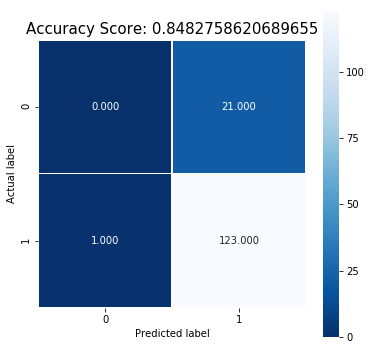

In [49]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {}'.format(score1)
plt.title(all_sample_title, size = 15);